pyFFTW not found, using Numpy FT.


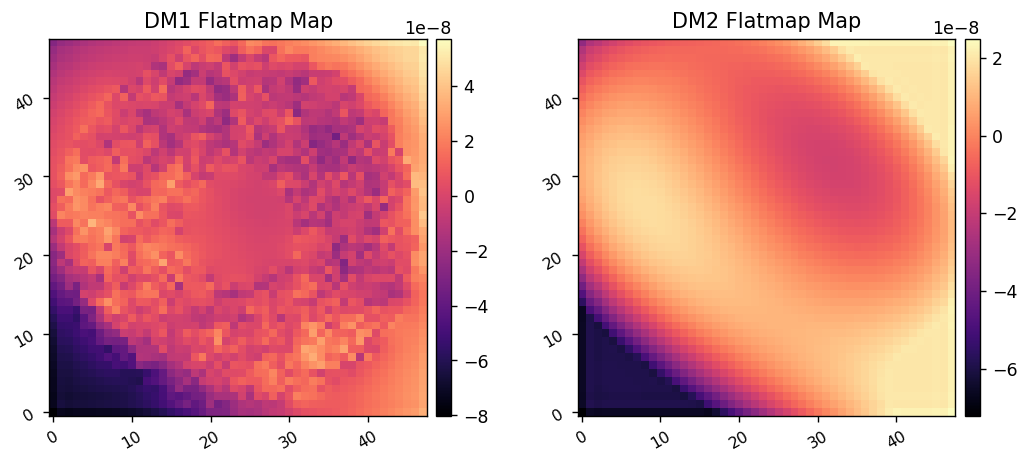

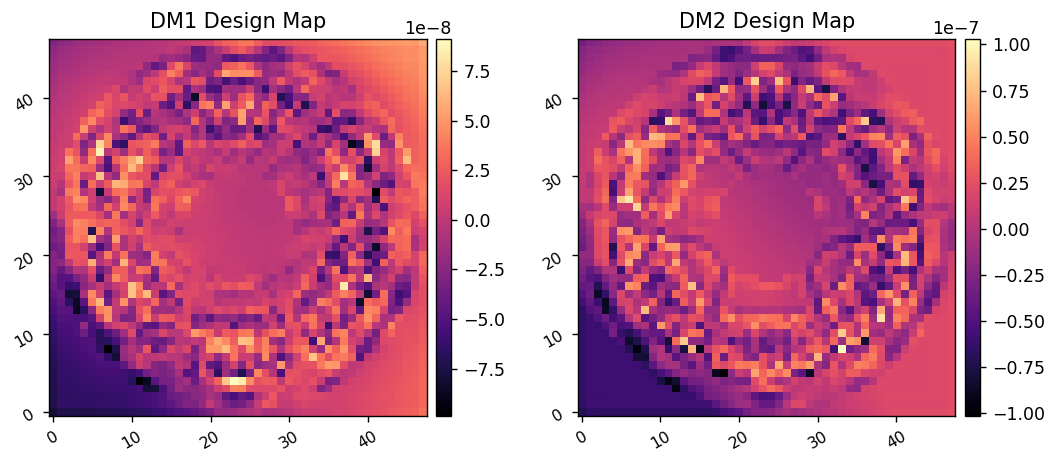

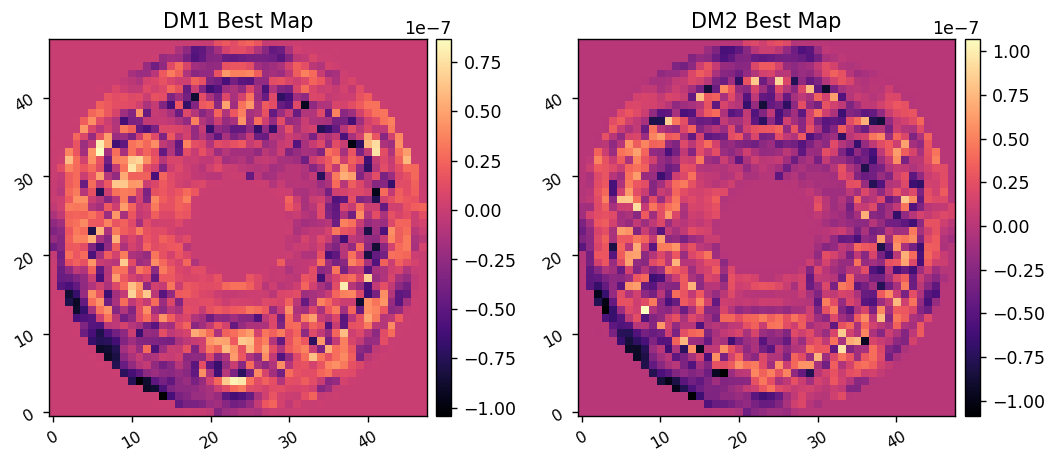

In [20]:
import numpy as np
from astropy.io import fits
import os
from pathlib import Path
import copy
import shutil
from importlib import reload

import matplotlib.pyplot as plt

import falco
import proper
proper.prop_use_fftw(DISABLE=True)

import misc

import falco_hlc_band1_setup_config as config
import falco_utils as fu
reload(config)
reload(fu)

misc.myimshow2(fu.dm1_flatmap, fu.dm2_flatmap, 'DM1 Flatmap Map', 'DM2 Flatmap Map')
misc.myimshow2(fu.dm1_total, fu.dm2_total, 'DM1 Design Map', 'DM2 Design Map')
misc.myimshow2(fu.dm1_best, fu.dm2_best, 'DM1 Best Map', 'DM2 Best Map')

# Setup the configuration

In [22]:
reload(config)
mp = config.setup(N_subpass=1, N_waves_per_subpass=1, fractional_bandwidth=0.01,
                  estimator='perfect', 
                  N_iterations=30,
                  spatial_weighting=[],
                  dark_hole_sides='r',
                  dm1_initial=fu.dm1_best, dm2_initial=fu.dm2_best,
                 )

/home/u21/kianmilani/src/pyfalco/falco/config


In [23]:
mp.runLabel = 'hlc_band1_best_' + mp.estimator + '_bw{:.2f}_'.format(mp.fracBW) \
              + mp.Fend.sides + '_{:d}itr'.format(mp.Nitr) + '_v1'
print(mp.runLabel)

hlc_band1_best_perfect_bw0.01_r_30itr_v1


Performing phase retrieval.

	Performing retrieval for sub-bandpass 1.
	Getting aberrations from full optical train.
	Using pinhole at FPM to get back-end aberrations.


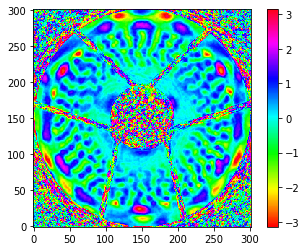

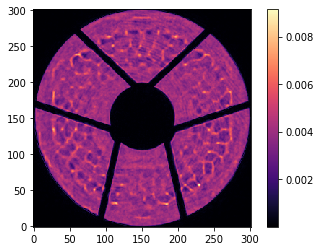

Phase retrieval complete.


In [24]:
config.perform_phase_retrieval(mp, quiet=True)

 Using 1 discrete wavelength(s) in each of 1 sub-bandpasses over a 1.0% total bandpass 

Sub-bandpasses are centered at wavelengths [nm]:	 [575.]


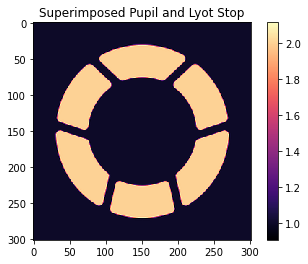

  Influence function padded from 84 to 84 points for A.S. propagation.
Computing datacube of DM influence functions... done.
  Influence function padded from 84 to 84 points for A.S. propagation.
Computing datacube of DM influence functions... done.


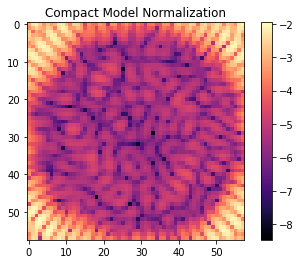

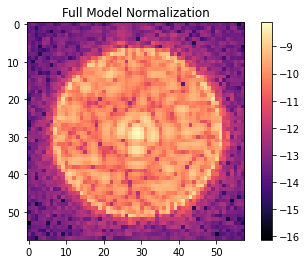


Beginning Trial 1 of Series 1.

DM 1-to-2 Fresnel number (using radius) = 932.0391304347827


In [25]:
# setup the workspace
out = falco.setup.flesh_out_workspace(mp)

In [14]:
modvar = falco.config.Object()  # Initialize the new structure
modvar.whichSource = 'star'
modvar.starIndex = 0
modvar.zernIndex = 1
modvar.sbpIndex = 0  # Dummy, placeholder value
modvar.wpsbpIndex = 0  # Dummy, placeholder value

In [15]:
Efull = falco.model.full(mp, modvar)

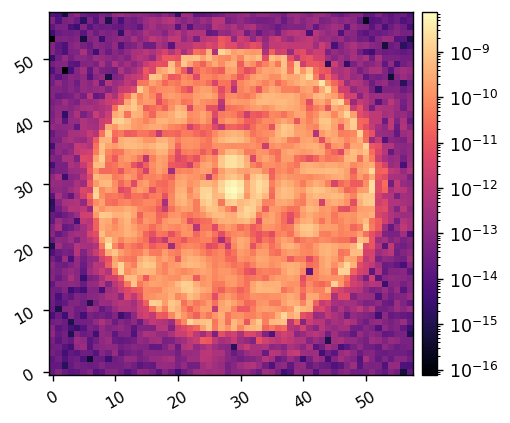

In [17]:
misc.myimshow(np.abs(Efull)**2, lognorm=True)

# Perform the Wavefront Sensing and Control

Iteration: 0 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


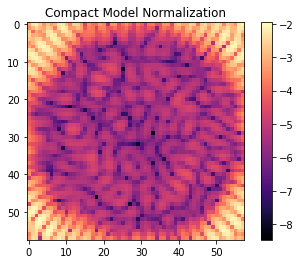

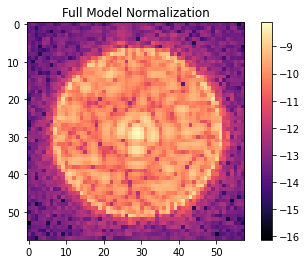

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 46.158369302749634
Weeding out weak actuators from the control Jacobian...
  DM1: 1762/2304 (76.48%) actuators kept for Jacobian
  DM2: 1786/2304 (77.52%) actuators kept for Jacobian
[Getting updated summed image]	Elapsed: 15.446430921554565


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


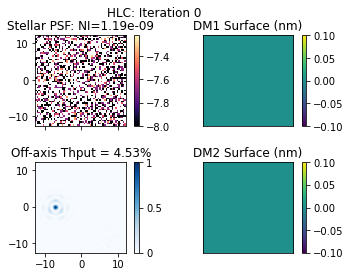

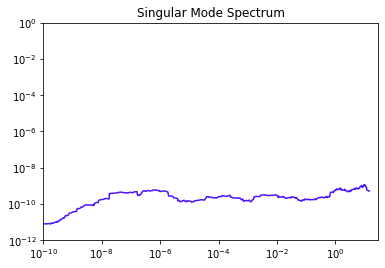

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.74e-07	9.22e-08	4.83e-08	2.53e-08	1.34e-08	7.33e-09	4.20e-09	2.52e-09	1.54e-09	9.53e-10	5.88e-10	3.66e-10	2.39e-10	1.69e-10	1.32e-10	1.13e-10	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 1.13e-10 normalized intensity.
 DM1 P-V in volts: 0.091
 DM2 P-V in volts: 0.085
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 1.19e-09 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 1 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


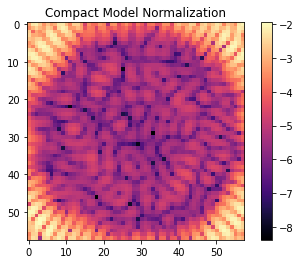

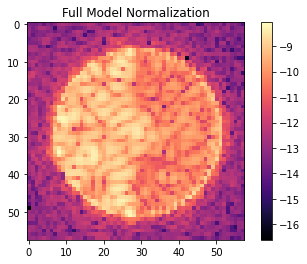

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.571969747543335
[Getting updated summed image]	Elapsed: 15.296595335006714


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


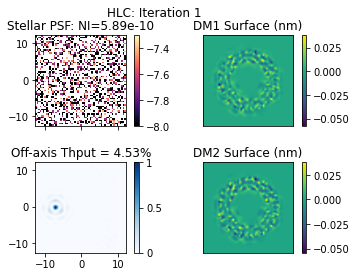

Complex projection of deltaE is 1.06    for subband 0/0
Complex correlation of deltaE is 1.00    for subband 0/0


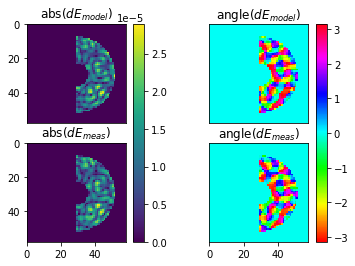

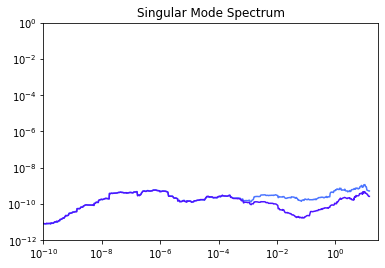

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.72e-07	9.16e-08	4.82e-08	2.52e-08	1.34e-08	7.37e-09	4.25e-09	2.55e-09	1.56e-09	9.51e-10	5.77e-10	3.52e-10	2.24e-10	1.55e-10	1.19e-10	1.01e-10	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 1.01e-10 normalized intensity.
 DM1 P-V in volts: 0.160
 DM2 P-V in volts: 0.125
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 5.89e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 2 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


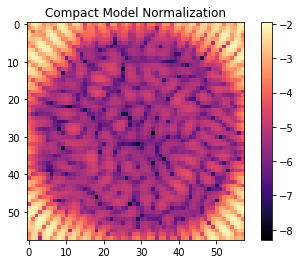

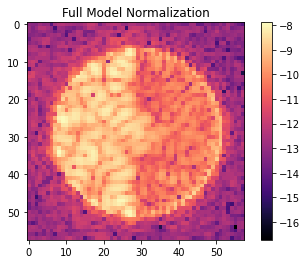

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.84042692184448
[Getting updated summed image]	Elapsed: 16.183807849884033


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


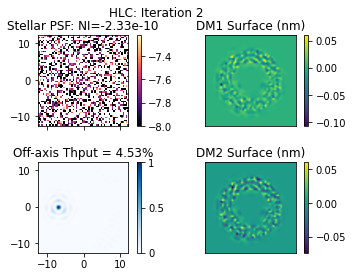

Complex projection of deltaE is 0.72    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0


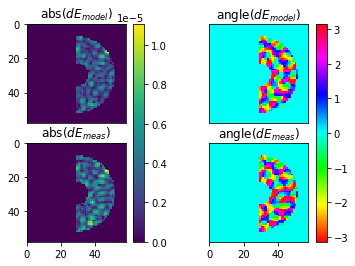

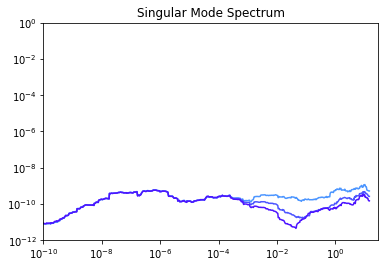

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.15e-08	4.80e-08	2.51e-08	1.33e-08	7.29e-09	4.17e-09	2.48e-09	1.49e-09	8.97e-10	5.36e-10	3.23e-10	2.04e-10	1.42e-10	1.10e-10	9.48e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 9.48e-11 normalized intensity.
 DM1 P-V in volts: 0.216
 DM2 P-V in volts: 0.158
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -2.33e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 3 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


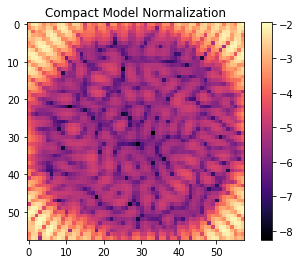

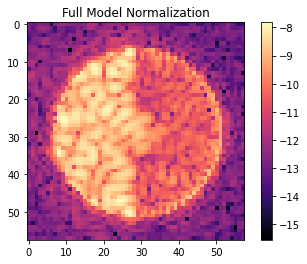

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.38121843338013
[Getting updated summed image]	Elapsed: 15.5193452835083


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


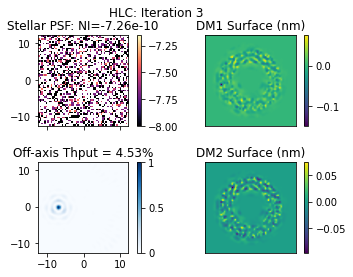

Complex projection of deltaE is 0.69    for subband 0/0
Complex correlation of deltaE is 0.89    for subband 0/0


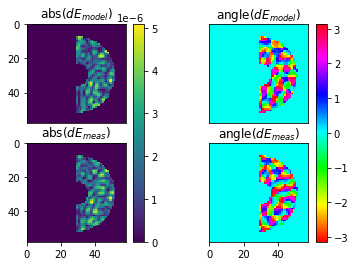

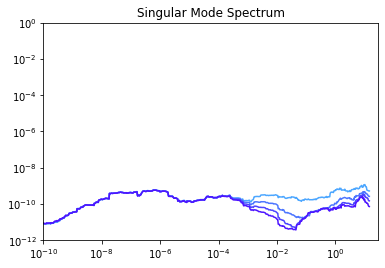

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.12e-08	4.79e-08	2.50e-08	1.32e-08	7.21e-09	4.10e-09	2.41e-09	1.43e-09	8.49e-10	5.00e-10	2.99e-10	1.89e-10	1.32e-10	1.04e-10	9.06e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 9.06e-11 normalized intensity.
 DM1 P-V in volts: 0.262
 DM2 P-V in volts: 0.191
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -7.26e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 4 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


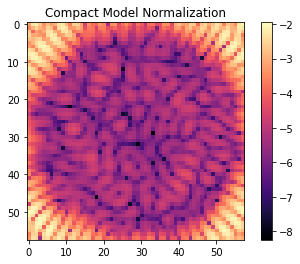

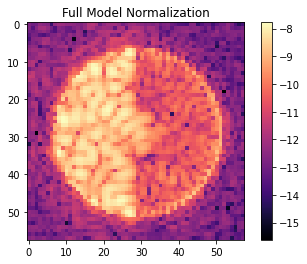

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.76136875152588
[Getting updated summed image]	Elapsed: 16.030872344970703


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


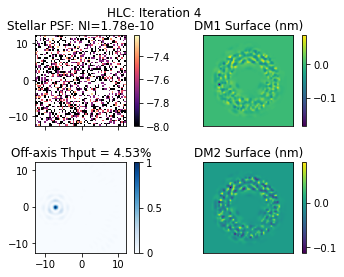

Complex projection of deltaE is 0.61    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0


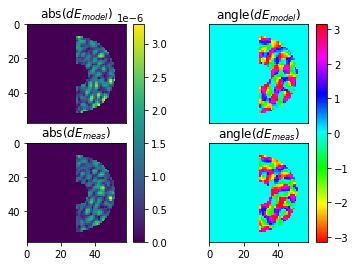

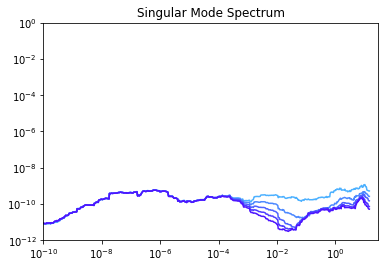

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.11e-08	4.78e-08	2.49e-08	1.31e-08	7.13e-09	4.03e-09	2.35e-09	1.38e-09	8.07e-10	4.69e-10	2.78e-10	1.76e-10	1.24e-10	9.89e-11	8.72e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 8.72e-11 normalized intensity.
 DM1 P-V in volts: 0.301
 DM2 P-V in volts: 0.224
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 1.78e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 5 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


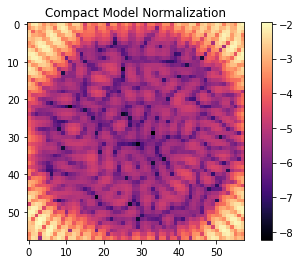

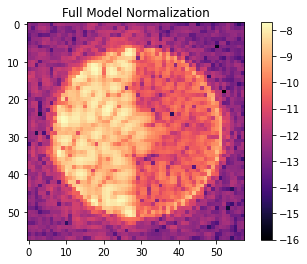

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.77453422546387
[Getting updated summed image]	Elapsed: 15.938859939575195


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


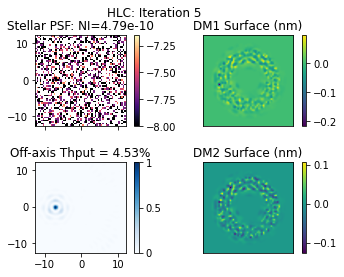

Complex projection of deltaE is 0.51    for subband 0/0
Complex correlation of deltaE is 0.98    for subband 0/0


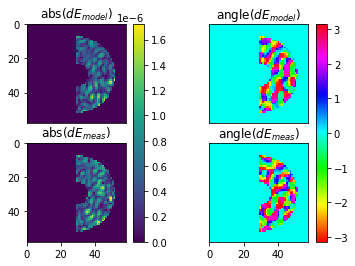

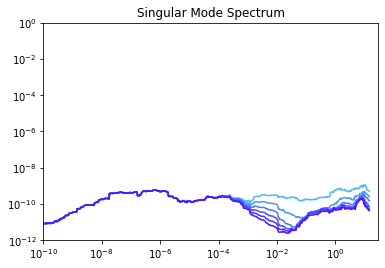

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.11e-08	4.77e-08	2.48e-08	1.30e-08	7.05e-09	3.96e-09	2.29e-09	1.33e-09	7.69e-10	4.42e-10	2.60e-10	1.65e-10	1.17e-10	9.46e-11	8.43e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 8.43e-11 normalized intensity.
 DM1 P-V in volts: 0.334
 DM2 P-V in volts: 0.255
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 4.79e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 6 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


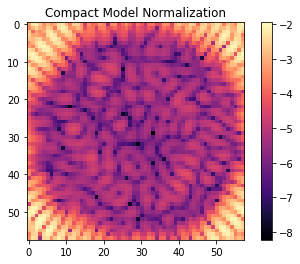

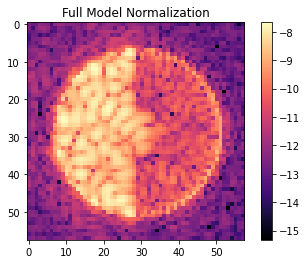

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.786624908447266
[Getting updated summed image]	Elapsed: 16.274635553359985


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


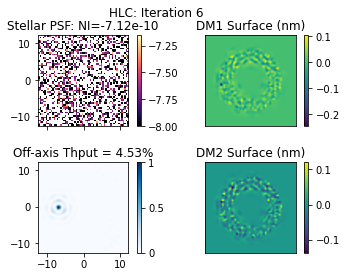

Complex projection of deltaE is 0.41    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0


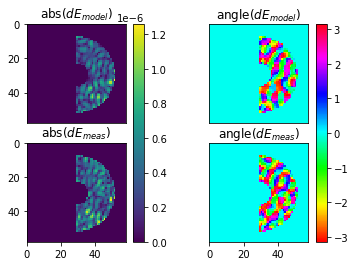

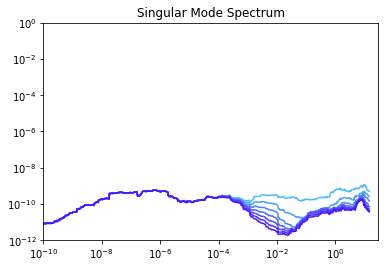

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.10e-08	4.76e-08	2.47e-08	1.30e-08	6.98e-09	3.89e-09	2.23e-09	1.28e-09	7.33e-10	4.18e-10	2.45e-10	1.55e-10	1.11e-10	9.09e-11	8.17e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 8.17e-11 normalized intensity.
 DM1 P-V in volts: 0.364
 DM2 P-V in volts: 0.284
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -7.12e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 7 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


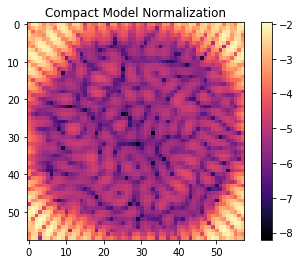

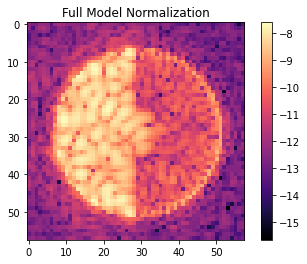

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.86929106712341
[Getting updated summed image]	Elapsed: 16.595295429229736


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


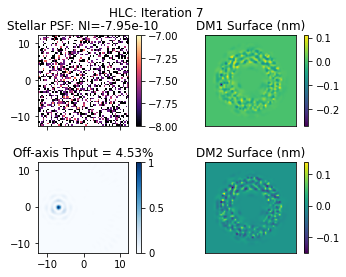

Complex projection of deltaE is 0.36    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0


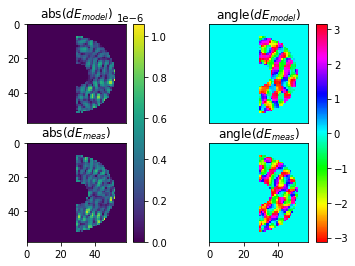

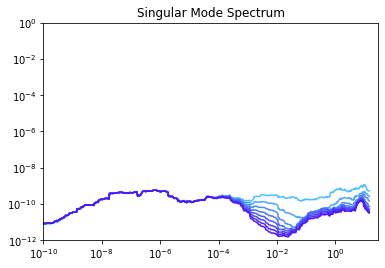

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.09e-08	4.75e-08	2.46e-08	1.29e-08	6.90e-09	3.83e-09	2.17e-09	1.24e-09	7.01e-10	3.96e-10	2.31e-10	1.47e-10	1.06e-10	8.78e-11	7.96e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.96e-11 normalized intensity.
 DM1 P-V in volts: 0.391
 DM2 P-V in volts: 0.312
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -7.95e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 8 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


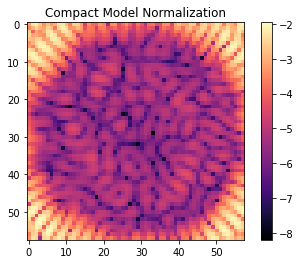

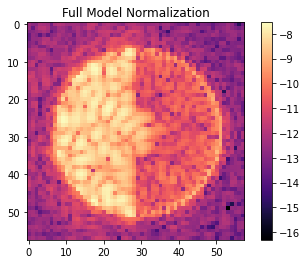

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.78596043586731
[Getting updated summed image]	Elapsed: 16.985899209976196


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


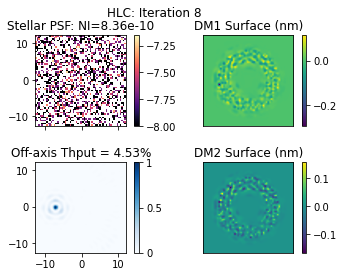

Complex projection of deltaE is 0.33    for subband 0/0
Complex correlation of deltaE is 0.98    for subband 0/0


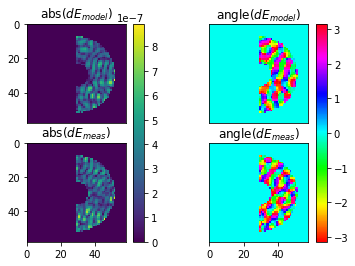

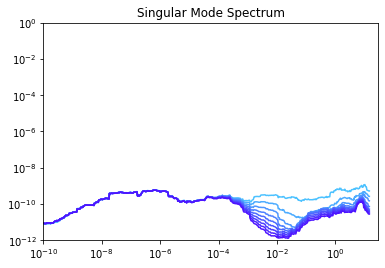

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.09e-08	4.75e-08	2.46e-08	1.28e-08	6.83e-09	3.76e-09	2.12e-09	1.20e-09	6.71e-10	3.76e-10	2.19e-10	1.40e-10	1.02e-10	8.52e-11	7.77e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.77e-11 normalized intensity.
 DM1 P-V in volts: 0.419
 DM2 P-V in volts: 0.342
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 8.36e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 9 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


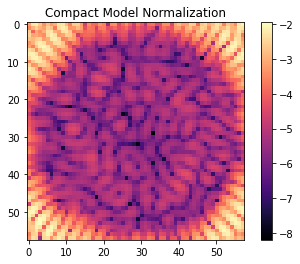

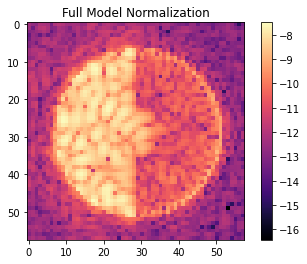

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.31045889854431
[Getting updated summed image]	Elapsed: 17.01537799835205


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


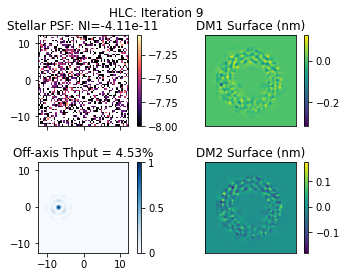

Complex projection of deltaE is 0.31    for subband 0/0
Complex correlation of deltaE is 0.97    for subband 0/0


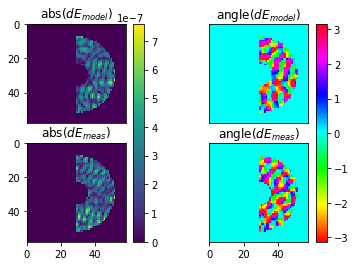

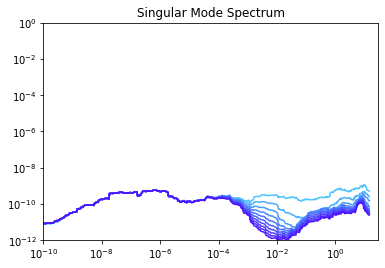

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.08e-08	4.74e-08	2.45e-08	1.27e-08	6.75e-09	3.70e-09	2.07e-09	1.16e-09	6.44e-10	3.59e-10	2.08e-10	1.33e-10	9.85e-11	8.30e-11	7.62e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.62e-11 normalized intensity.
 DM1 P-V in volts: 0.449
 DM2 P-V in volts: 0.371
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -4.11e-11 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 10 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


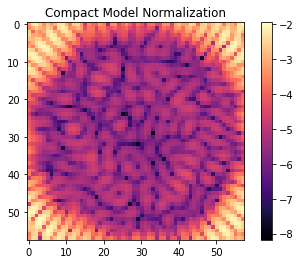

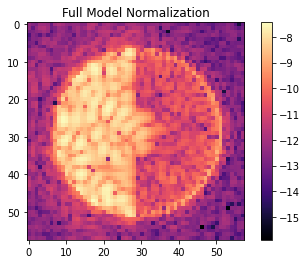

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.175442695617676
[Getting updated summed image]	Elapsed: 17.764791011810303


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


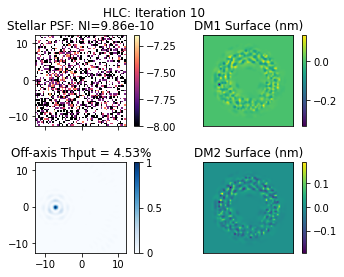

Complex projection of deltaE is 0.29    for subband 0/0
Complex correlation of deltaE is 0.95    for subband 0/0


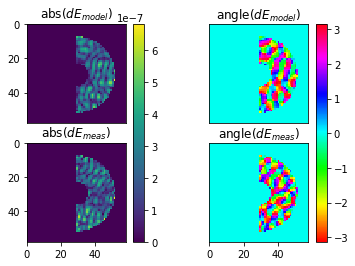

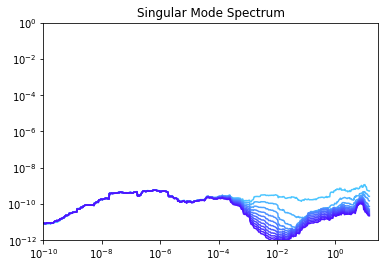

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.07e-08	4.73e-08	2.44e-08	1.26e-08	6.68e-09	3.64e-09	2.02e-09	1.12e-09	6.19e-10	3.43e-10	1.99e-10	1.28e-10	9.54e-11	8.10e-11	7.48e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.48e-11 normalized intensity.
 DM1 P-V in volts: 0.477
 DM2 P-V in volts: 0.397
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 9.86e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 11 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


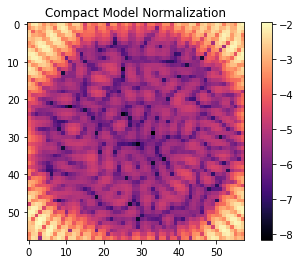

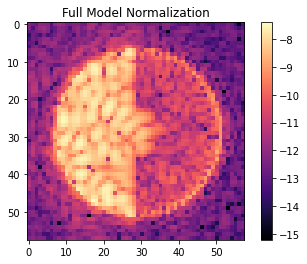

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.37639760971069
[Getting updated summed image]	Elapsed: 17.49444317817688


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


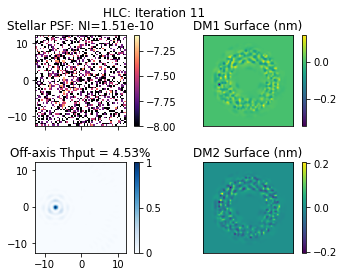

Complex projection of deltaE is 0.28    for subband 0/0
Complex correlation of deltaE is 0.94    for subband 0/0


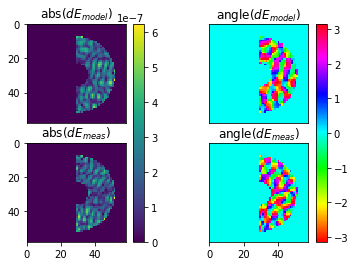

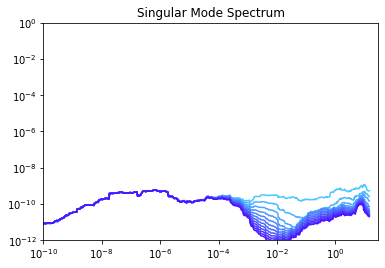

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.71e-07	9.06e-08	4.72e-08	2.43e-08	1.26e-08	6.62e-09	3.58e-09	1.98e-09	1.09e-09	5.96e-10	3.28e-10	1.90e-10	1.23e-10	9.26e-11	7.93e-11	7.36e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.36e-11 normalized intensity.
 DM1 P-V in volts: 0.504
 DM2 P-V in volts: 0.423
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 1.51e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 12 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


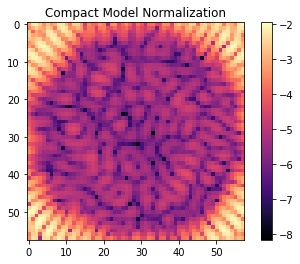

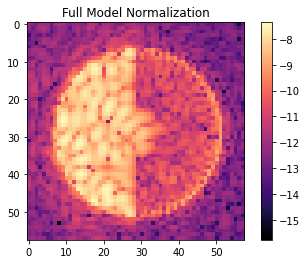

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.01354789733887
[Getting updated summed image]	Elapsed: 17.99549436569214


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


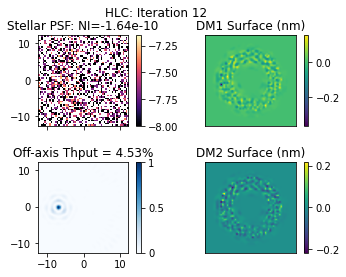

Complex projection of deltaE is 0.26    for subband 0/0
Complex correlation of deltaE is 0.94    for subband 0/0


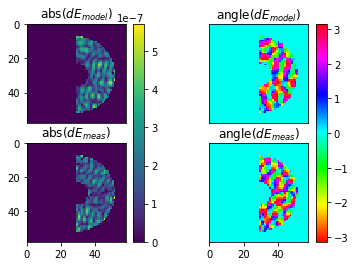

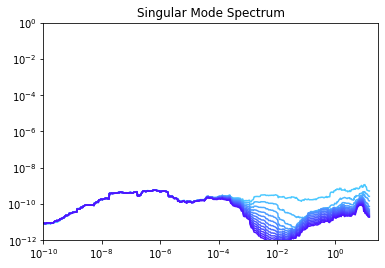

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	9.05e-08	4.71e-08	2.42e-08	1.25e-08	6.55e-09	3.53e-09	1.93e-09	1.06e-09	5.75e-10	3.15e-10	1.82e-10	1.19e-10	9.02e-11	7.78e-11	7.26e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.26e-11 normalized intensity.
 DM1 P-V in volts: 0.529
 DM2 P-V in volts: 0.447
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -1.64e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 13 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


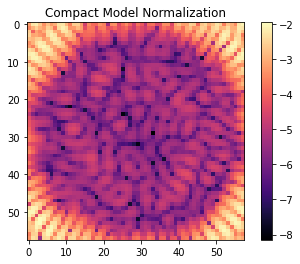

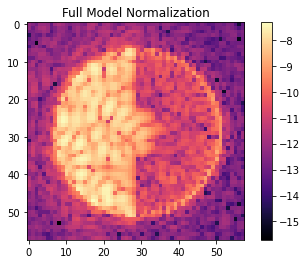

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.50812339782715
[Getting updated summed image]	Elapsed: 17.93236780166626


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


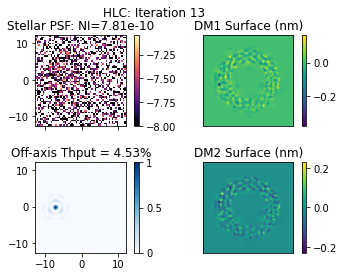

Complex projection of deltaE is 0.25    for subband 0/0
Complex correlation of deltaE is 0.93    for subband 0/0


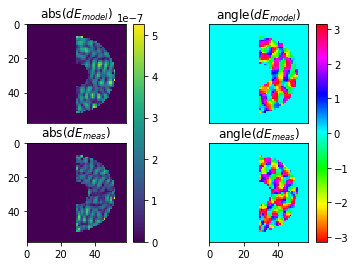

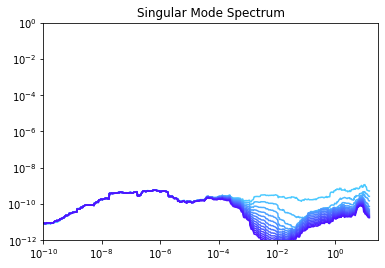

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	9.04e-08	4.70e-08	2.41e-08	1.24e-08	6.49e-09	3.48e-09	1.89e-09	1.03e-09	5.55e-10	3.02e-10	1.75e-10	1.15e-10	8.80e-11	7.65e-11	7.17e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.17e-11 normalized intensity.
 DM1 P-V in volts: 0.553
 DM2 P-V in volts: 0.470
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 7.81e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 14 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


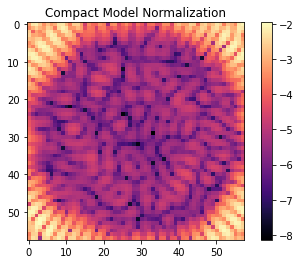

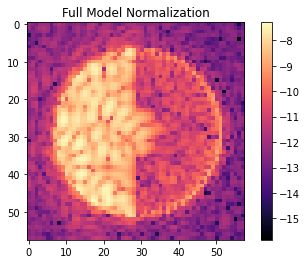

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.16167211532593
[Getting updated summed image]	Elapsed: 17.788859128952026


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


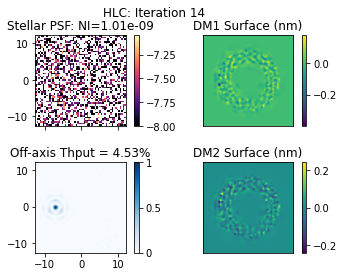

Complex projection of deltaE is 0.25    for subband 0/0
Complex correlation of deltaE is 0.93    for subband 0/0


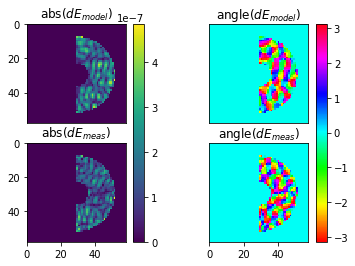

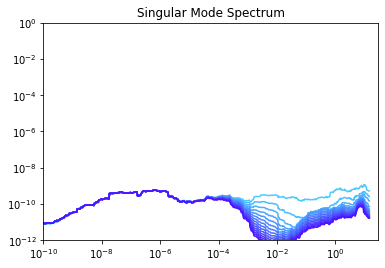

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	9.03e-08	4.69e-08	2.41e-08	1.23e-08	6.43e-09	3.43e-09	1.85e-09	1.00e-09	5.37e-10	2.91e-10	1.69e-10	1.11e-10	8.61e-11	7.53e-11	7.08e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.08e-11 normalized intensity.
 DM1 P-V in volts: 0.577
 DM2 P-V in volts: 0.491
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 1.01e-09 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 15 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


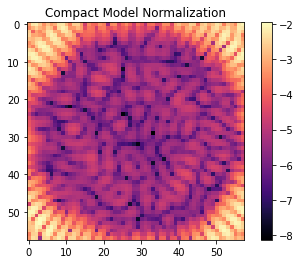

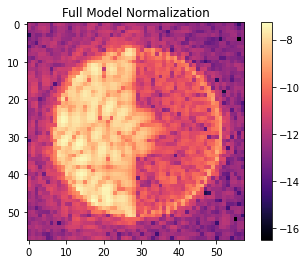

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.40362024307251
[Getting updated summed image]	Elapsed: 18.171765327453613


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


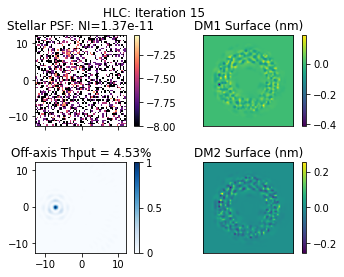

Complex projection of deltaE is 0.24    for subband 0/0
Complex correlation of deltaE is 0.92    for subband 0/0


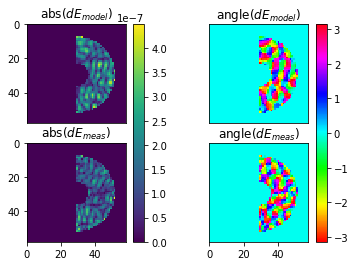

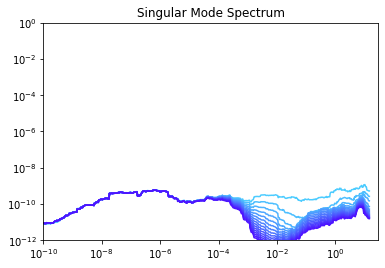

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	9.02e-08	4.68e-08	2.40e-08	1.23e-08	6.37e-09	3.38e-09	1.82e-09	9.76e-10	5.20e-10	2.81e-10	1.63e-10	1.08e-10	8.43e-11	7.42e-11	7.01e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 7.01e-11 normalized intensity.
 DM1 P-V in volts: 0.599
 DM2 P-V in volts: 0.512
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 1.37e-11 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 16 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


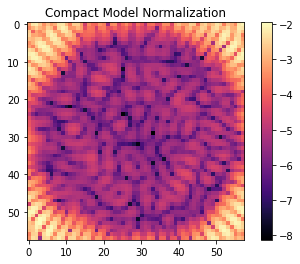

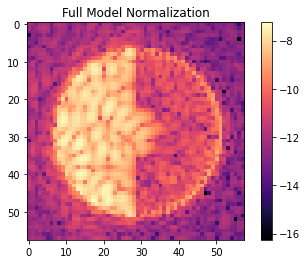

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.340129137039185
[Getting updated summed image]	Elapsed: 19.073259115219116


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


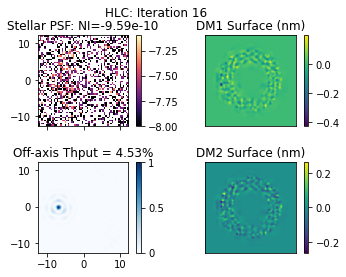

Complex projection of deltaE is 0.23    for subband 0/0
Complex correlation of deltaE is 0.90    for subband 0/0


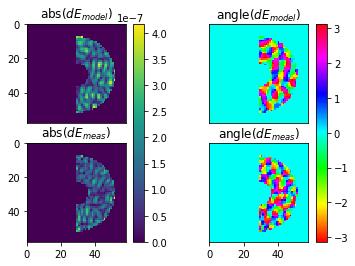

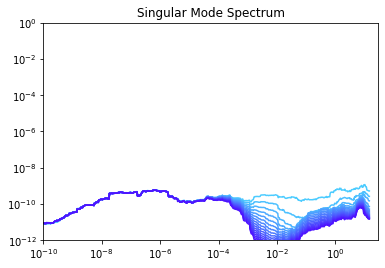

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	9.01e-08	4.68e-08	2.39e-08	1.22e-08	6.31e-09	3.33e-09	1.78e-09	9.51e-10	5.04e-10	2.71e-10	1.58e-10	1.05e-10	8.28e-11	7.33e-11	6.94e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.94e-11 normalized intensity.
 DM1 P-V in volts: 0.620
 DM2 P-V in volts: 0.532
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -9.59e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 17 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


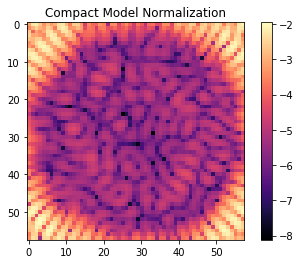

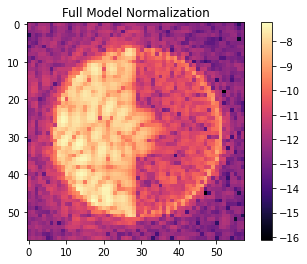

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.79370927810669
[Getting updated summed image]	Elapsed: 19.235199689865112


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


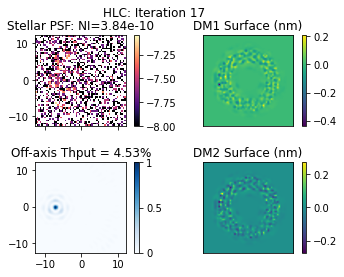

Complex projection of deltaE is 0.22    for subband 0/0
Complex correlation of deltaE is 0.89    for subband 0/0


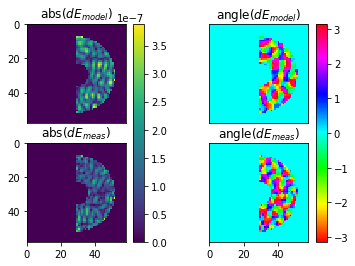

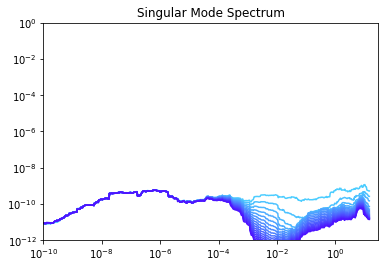

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	9.00e-08	4.67e-08	2.38e-08	1.21e-08	6.25e-09	3.29e-09	1.75e-09	9.28e-10	4.89e-10	2.63e-10	1.53e-10	1.03e-10	8.13e-11	7.24e-11	6.87e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.87e-11 normalized intensity.
 DM1 P-V in volts: 0.640
 DM2 P-V in volts: 0.552
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 3.84e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 18 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


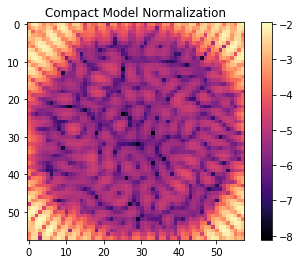

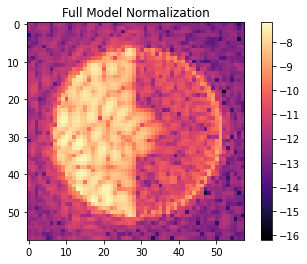

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.50384759902954
[Getting updated summed image]	Elapsed: 18.950063943862915


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


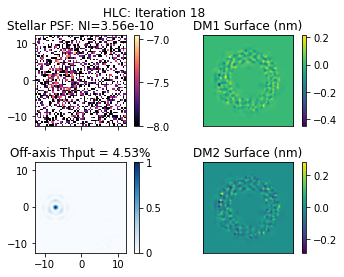

Complex projection of deltaE is 0.21    for subband 0/0
Complex correlation of deltaE is 0.88    for subband 0/0


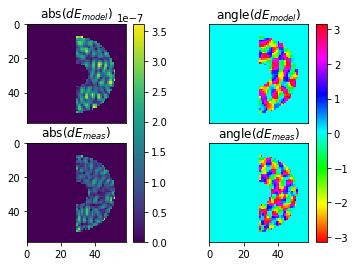

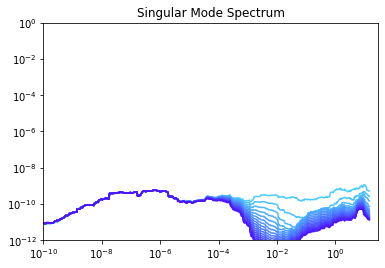

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	8.99e-08	4.66e-08	2.37e-08	1.21e-08	6.20e-09	3.25e-09	1.72e-09	9.06e-10	4.75e-10	2.54e-10	1.48e-10	1.01e-10	8.00e-11	7.16e-11	6.81e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.81e-11 normalized intensity.
 DM1 P-V in volts: 0.659
 DM2 P-V in volts: 0.570
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 3.56e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 19 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


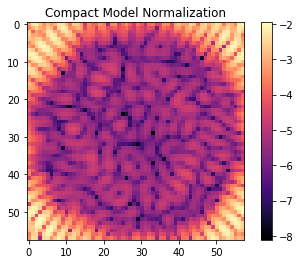

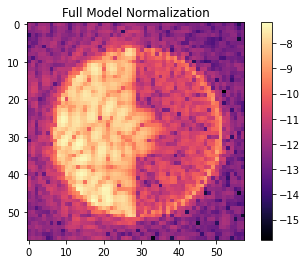

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.42372417449951
[Getting updated summed image]	Elapsed: 19.136711597442627


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


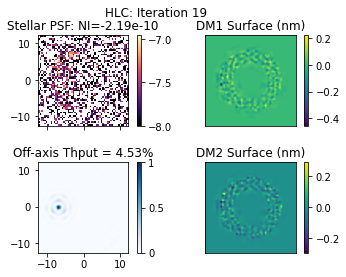

Complex projection of deltaE is 0.21    for subband 0/0
Complex correlation of deltaE is 0.87    for subband 0/0


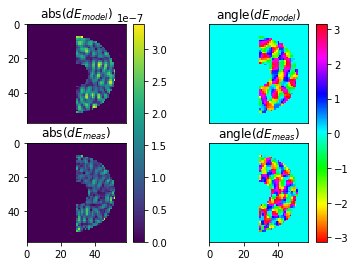

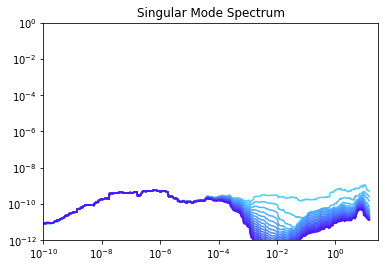

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.70e-07	8.98e-08	4.65e-08	2.37e-08	1.20e-08	6.15e-09	3.21e-09	1.69e-09	8.85e-10	4.62e-10	2.47e-10	1.44e-10	9.83e-11	7.88e-11	7.08e-11	6.76e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.76e-11 normalized intensity.
 DM1 P-V in volts: 0.678
 DM2 P-V in volts: 0.588
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -2.19e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 20 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


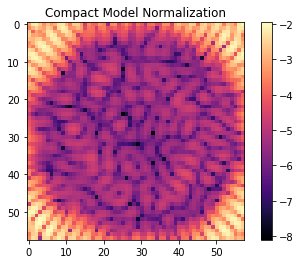

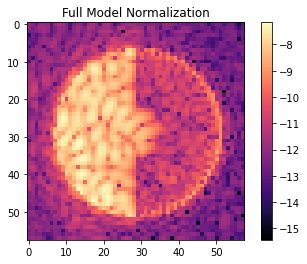

Core throughput within the half-max isophote(s) = 4.53% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.86447072029114
[Getting updated summed image]	Elapsed: 19.467268705368042


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


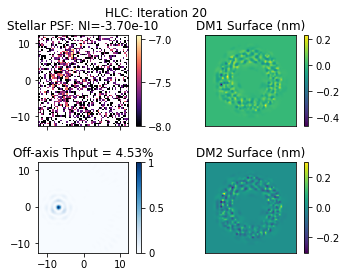

Complex projection of deltaE is 0.20    for subband 0/0
Complex correlation of deltaE is 0.86    for subband 0/0


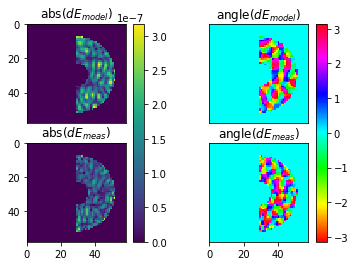

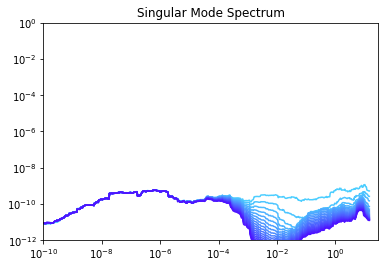

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.97e-08	4.64e-08	2.36e-08	1.19e-08	6.10e-09	3.17e-09	1.66e-09	8.66e-10	4.49e-10	2.40e-10	1.40e-10	9.63e-11	7.77e-11	7.02e-11	6.71e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.71e-11 normalized intensity.
 DM1 P-V in volts: 0.696
 DM2 P-V in volts: 0.605
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -3.70e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 21 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


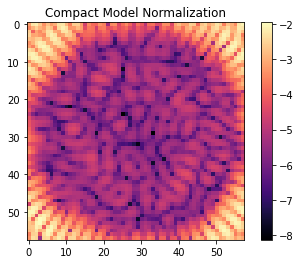

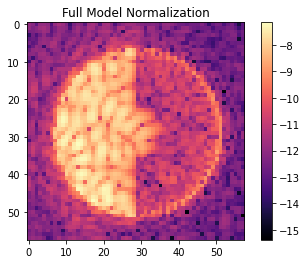

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.04107594490051
[Getting updated summed image]	Elapsed: 20.71492576599121


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


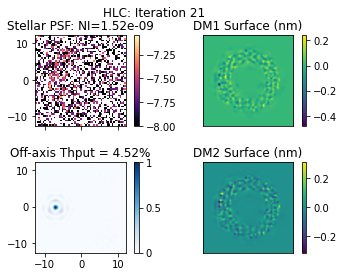

Complex projection of deltaE is 0.19    for subband 0/0
Complex correlation of deltaE is 0.85    for subband 0/0


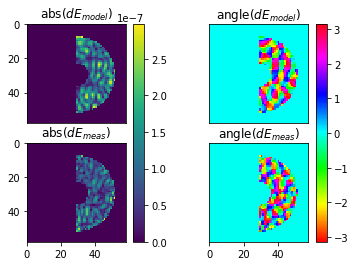

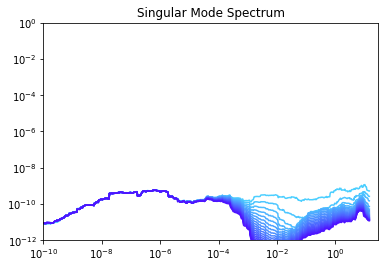

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.96e-08	4.63e-08	2.35e-08	1.19e-08	6.05e-09	3.13e-09	1.63e-09	8.47e-10	4.38e-10	2.33e-10	1.37e-10	9.45e-11	7.67e-11	6.95e-11	6.66e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.66e-11 normalized intensity.
 DM1 P-V in volts: 0.713
 DM2 P-V in volts: 0.622
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 1.52e-09 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 22 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


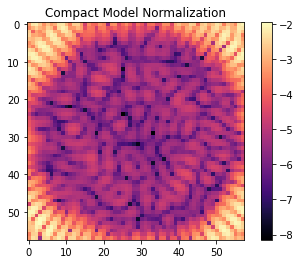

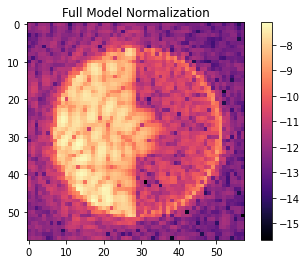

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.60057282447815
[Getting updated summed image]	Elapsed: 20.117276668548584


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


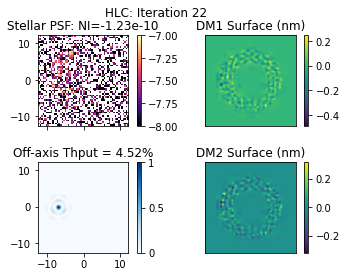

Complex projection of deltaE is 0.19    for subband 0/0
Complex correlation of deltaE is 0.84    for subband 0/0


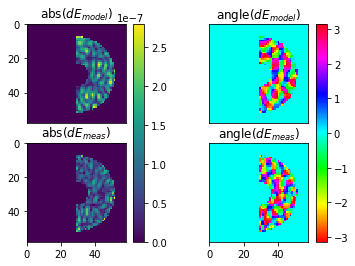

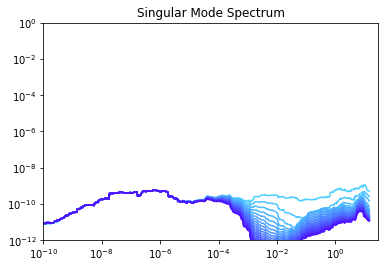

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.95e-08	4.62e-08	2.34e-08	1.18e-08	6.00e-09	3.09e-09	1.60e-09	8.29e-10	4.27e-10	2.27e-10	1.34e-10	9.28e-11	7.58e-11	6.89e-11	6.62e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.62e-11 normalized intensity.
 DM1 P-V in volts: 0.729
 DM2 P-V in volts: 0.638
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -1.23e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 23 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


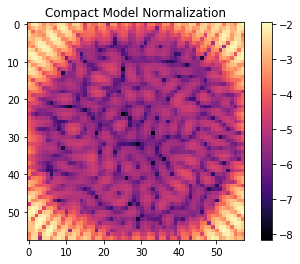

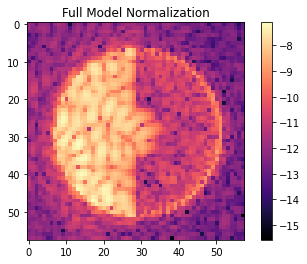

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.76491355895996
[Getting updated summed image]	Elapsed: 20.980032444000244


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


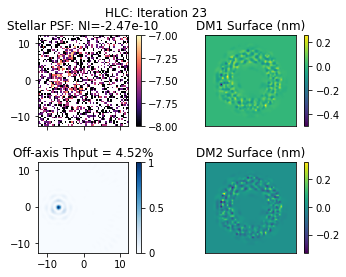

Complex projection of deltaE is 0.18    for subband 0/0
Complex correlation of deltaE is 0.83    for subband 0/0


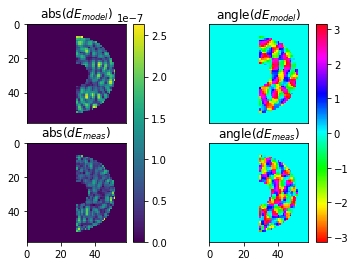

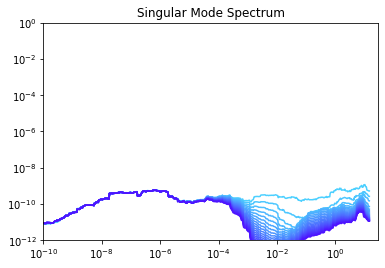

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.94e-08	4.61e-08	2.34e-08	1.18e-08	5.95e-09	3.06e-09	1.58e-09	8.12e-10	4.17e-10	2.21e-10	1.31e-10	9.12e-11	7.49e-11	6.84e-11	6.58e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.58e-11 normalized intensity.
 DM1 P-V in volts: 0.744
 DM2 P-V in volts: 0.654
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -2.47e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 24 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


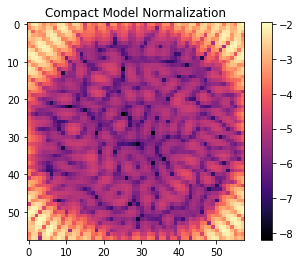

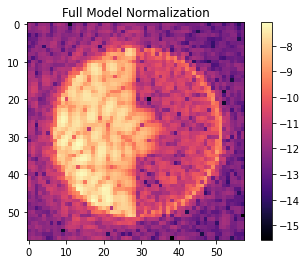

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.7192542552948
[Getting updated summed image]	Elapsed: 20.50961995124817


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


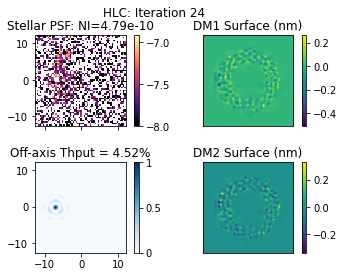

Complex projection of deltaE is 0.18    for subband 0/0
Complex correlation of deltaE is 0.83    for subband 0/0


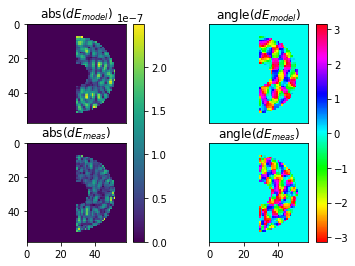

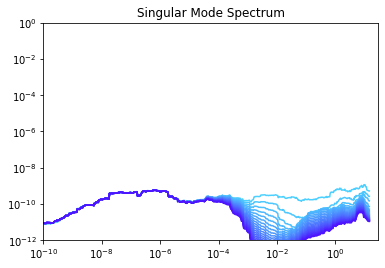

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.93e-08	4.61e-08	2.33e-08	1.17e-08	5.91e-09	3.02e-09	1.55e-09	7.96e-10	4.07e-10	2.16e-10	1.28e-10	8.97e-11	7.41e-11	6.79e-11	6.54e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.54e-11 normalized intensity.
 DM1 P-V in volts: 0.759
 DM2 P-V in volts: 0.669
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 4.79e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 25 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


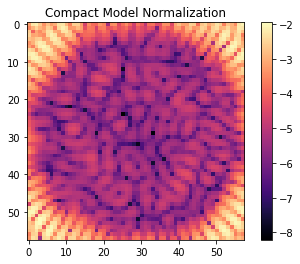

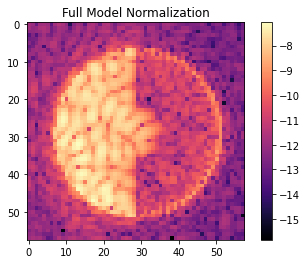

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 35.84106230735779
[Getting updated summed image]	Elapsed: 20.766834020614624


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


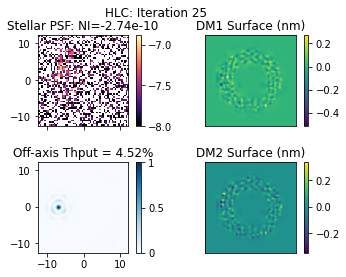

Complex projection of deltaE is 0.17    for subband 0/0
Complex correlation of deltaE is 0.82    for subband 0/0


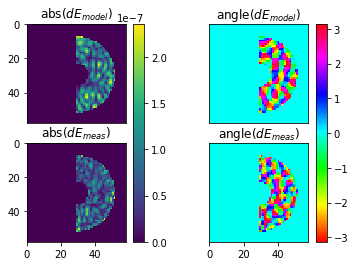

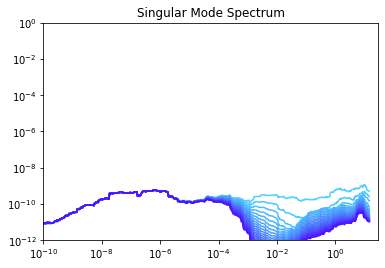

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.92e-08	4.60e-08	2.32e-08	1.16e-08	5.87e-09	2.99e-09	1.53e-09	7.81e-10	3.98e-10	2.11e-10	1.25e-10	8.83e-11	7.33e-11	6.74e-11	6.51e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.51e-11 normalized intensity.
 DM1 P-V in volts: 0.773
 DM2 P-V in volts: 0.684
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -2.74e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 26 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


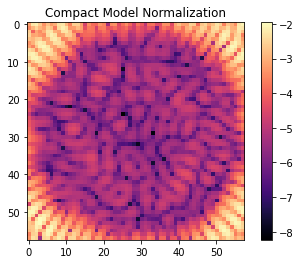

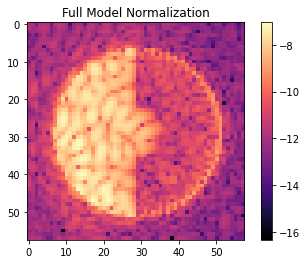

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.976940870285034
[Getting updated summed image]	Elapsed: 21.049697637557983


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


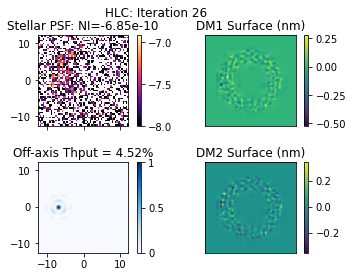

Complex projection of deltaE is 0.17    for subband 0/0
Complex correlation of deltaE is 0.82    for subband 0/0


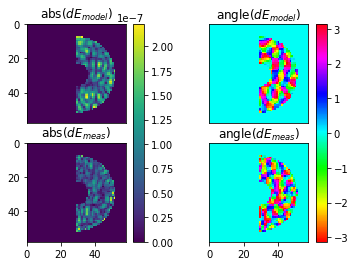

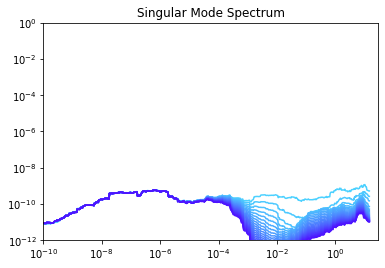

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.91e-08	4.59e-08	2.32e-08	1.16e-08	5.82e-09	2.96e-09	1.51e-09	7.66e-10	3.89e-10	2.06e-10	1.23e-10	8.71e-11	7.26e-11	6.70e-11	6.47e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.47e-11 normalized intensity.
 DM1 P-V in volts: 0.787
 DM2 P-V in volts: 0.698
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.0 nm
Previous Measured NI:			 -6.85e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 27 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


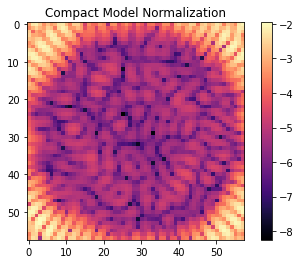

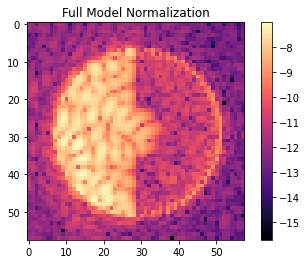

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.89809322357178
[Getting updated summed image]	Elapsed: 25.81393527984619


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


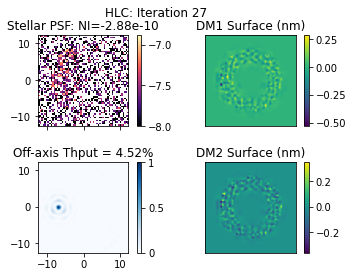

Complex projection of deltaE is 0.16    for subband 0/0
Complex correlation of deltaE is 0.81    for subband 0/0


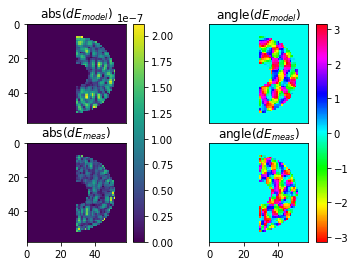

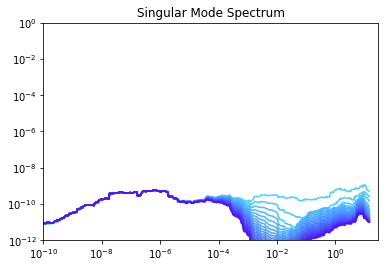

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.69e-07	8.90e-08	4.58e-08	2.31e-08	1.15e-08	5.78e-09	2.92e-09	1.49e-09	7.52e-10	3.80e-10	2.01e-10	1.20e-10	8.59e-11	7.20e-11	6.65e-11	6.44e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.44e-11 normalized intensity.
 DM1 P-V in volts: 0.800
 DM2 P-V in volts: 0.712
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.1 nm
Previous Measured NI:			 -2.88e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 28 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


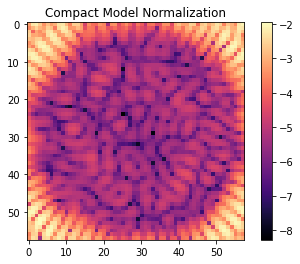

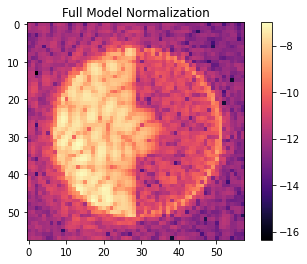

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.70308566093445
[Getting updated summed image]	Elapsed: 21.950183629989624


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


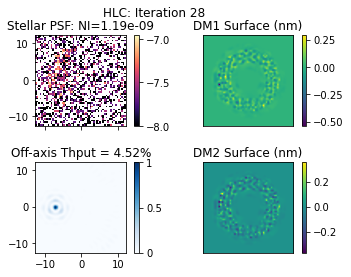

Complex projection of deltaE is 0.16    for subband 0/0
Complex correlation of deltaE is 0.81    for subband 0/0


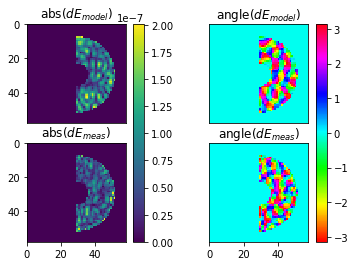

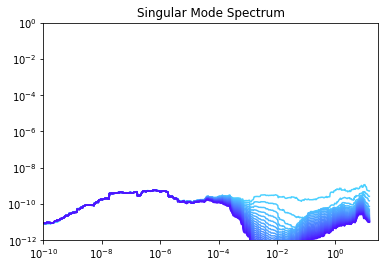

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.68e-07	8.89e-08	4.57e-08	2.30e-08	1.15e-08	5.74e-09	2.89e-09	1.47e-09	7.38e-10	3.73e-10	1.97e-10	1.18e-10	8.48e-11	7.14e-11	6.62e-11	6.41e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.41e-11 normalized intensity.
 DM1 P-V in volts: 0.812
 DM2 P-V in volts: 0.725
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.1 nm
Previous Measured NI:			 1.19e-09 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Iteration: 29 / 29
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


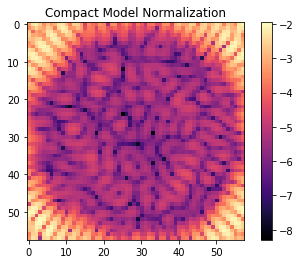

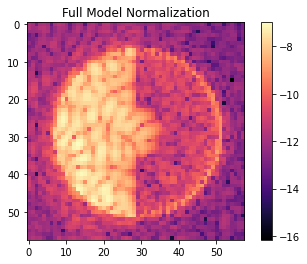

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in serial:
  mode0dm1...mode0dm2...done.
Elapsed: 36.78298044204712
[Getting updated summed image]	Elapsed: 21.091575384140015


/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',
/home/u21/kianmilani/src/pyfalco/falco/plot.py:42: RuntimeWarning: invalid value encountered in log10
  im1 = ax1.imshow(np.log10(Im), cmap='magma', interpolation='none',


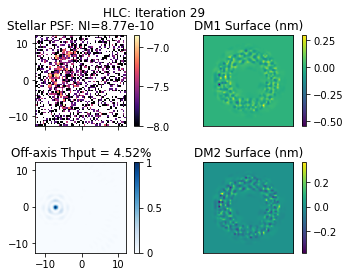

Complex projection of deltaE is 0.16    for subband 0/0
Complex correlation of deltaE is 0.80    for subband 0/0


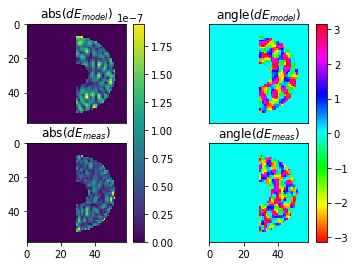

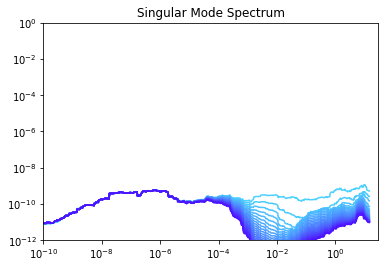

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		1.00		
log10reg:    		-6.0		-5.8		-5.5		-5.2		-5.0		-4.8		-4.5		-4.2		-4.0		-3.8		-3.5		-3.2		-3.0		-2.8		-2.5		-2.2		
Inorm:       		1.68e-07	8.88e-08	4.56e-08	2.30e-08	1.14e-08	5.70e-09	2.86e-09	1.44e-09	7.25e-10	3.65e-10	1.93e-10	1.16e-10	8.37e-11	7.08e-11	6.58e-11	6.38e-11	
Model-based grid search expects log10reg, = -2.2,	 dmfac = 1.00,	 6.38e-11 normalized intensity.
 DM1 P-V in volts: 0.824
 DM2 P-V in volts: 0.739
RMS surface of DM1 = 0.0 nm
RMS surface of DM2 = 0.1 nm
Previous Measured NI:			 8.77e-10 
Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_band1_best_perfect_bw0.01_r_30itr_v1_snippet.pkl  ...done.

Core throughput within the half-max isophote(s) = 4.52% 	at separation = (7.0, 0.0) lambda0/D.

Saving data snippet to:
	/home/u21/kianmilani/src/pyfalco/data/brief/hlc_ba

In [26]:
falco.wfsc.loop(mp, out)

fu.save_pickle(mp.runLabel, mp)